In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression

In [6]:
x,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [7]:
x

array([[-0.0742049 ,  0.58858762],
       [-0.60043621,  0.50160423],
       [-0.88190808, -0.31173541],
       ...,
       [-0.43032265,  1.15079399],
       [-2.571961  , -1.00071105],
       [ 0.60847873,  0.03315074]])

In [8]:
y

array([ 2.75815538e+01,  1.55186287e+01, -2.20814805e+01,  9.96081284e+00,
       -7.78400389e+01,  1.87250419e+01,  4.55869474e+01,  2.19793763e+01,
       -6.53125025e+00,  9.76502937e+01,  2.29469204e+01, -9.65062185e+00,
       -2.08580864e+01, -5.01502189e+00, -6.81041890e+01, -6.40365038e+01,
        3.41795161e+00, -9.25081862e+01, -2.59132007e+01,  1.78452854e+01,
        4.30851871e+01, -7.77002582e+01, -1.83920869e+01, -2.99487816e+01,
       -2.68992884e+01,  1.12542247e+02,  2.75385987e+01, -4.29835440e+01,
       -1.95706067e+00,  3.49247605e+00,  6.50637397e+00, -4.64520257e+01,
       -2.66977756e+01, -1.22428498e+01,  2.04093362e+01,  3.11302117e+01,
        1.15153535e+01,  3.95080362e+01, -1.55662008e+01,  7.80151721e+01,
        5.71032343e+01,  2.82015970e+01,  1.05148373e+01,  6.01287250e+01,
        9.37590941e+00,  1.68100552e+01,  6.13902351e+00,  7.10081041e+01,
       -4.96497364e+01,  1.38749286e+01, -3.16772438e+01,  1.51934249e+00,
        6.54234437e+01, -

<AxesSubplot:xlabel='0', ylabel='1'>

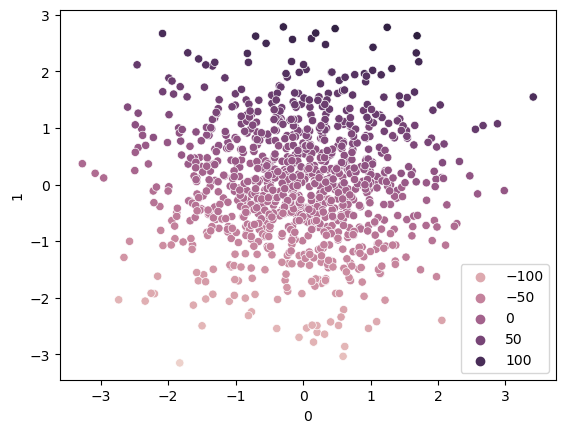

In [9]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=10)

In [14]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [15]:
svr

SVR(kernel='linear')

In [16]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [17]:
svr.coef_

array([[ 7.65185185, 42.99105985]])

In [18]:
y_pred=svr.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.996523176663401


In [20]:
# Cross-Validation

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [21]:
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5, refit=True, verbose=3)

In [22]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [24]:
y_pred4 = grid.predict(x_test)
print(r2_score(y_pred4, y_test))

0.9965409899602207
